In [2]:
import pickle
import pandas
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


In [3]:
os.chdir("../")
plt.style.use("plot_style.mplstyle")

MODEL_DIR = "trained_models/layer_target_indices"


In [4]:
iqr_folder = os.path.join(MODEL_DIR, "CIFAR_top5")
lira_folder = os.path.join(MODEL_DIR, "CIFAR_lira")

Layer 1
Jaccard Overlap/Overall Agreement: 32.32%
Points removed by LT-IQR: 1250,     Recall: 38.28%,   Precision: 67.52%
Layer 2
Jaccard Overlap/Overall Agreement: 41.15%
Points removed by LT-IQR: 2437,     Recall: 56.63%,   Precision: 60.07%
Layer 3
Jaccard Overlap/Overall Agreement: 47.53%
Points removed by LT-IQR: 3565,     Recall: 68.52%,   Precision: 60.81%
Layer 4
Jaccard Overlap/Overall Agreement: 48.85%
Points removed by LT-IQR: 4636,     Recall: 76.47%,   Precision: 57.48%
Layer 5
Jaccard Overlap/Overall Agreement: 46.12%
Points removed by LT-IQR: 5654,     Recall: 81.12%,   Precision: 51.66%
Layer 6
Jaccard Overlap/Overall Agreement: 44.23%
Points removed by LT-IQR: 6621,     Recall: 84.45%,   Precision: 48.15%


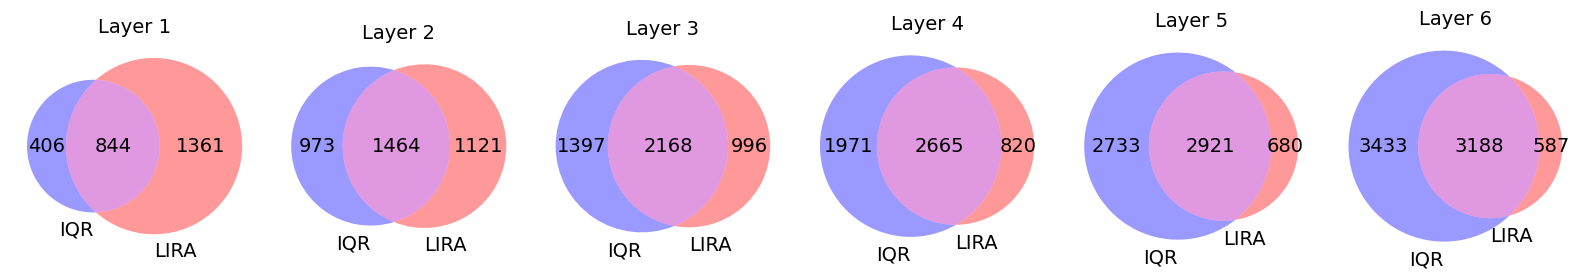

In [12]:
fig, axes = plt.subplots(1, 6, figsize=(16, 4))  # 1 row, 6 columns

jaccard = []
recall = []
precision = []
for layer in range(6):
    iqr_file = os.path.join(iqr_folder, f"layer_{layer}_vulnerable.pkl")
    lira_file = os.path.join(lira_folder, f"layer_{layer}_vulnerable.pkl")

    with open(iqr_file, "rb") as f:
        iqr_indices = set(pickle.load(f))

    with open(lira_file, "rb") as f:
        lira_indices = set(pickle.load(f))

    print("="*100)
    print(f"Layer {layer + 1}")
    percent_overlap = len(iqr_indices & lira_indices) / len(iqr_indices | lira_indices) * 100
    print(f"Jaccard Overlap/Overall Agreement: {percent_overlap:.2f}%")
    jaccard.append(percent_overlap)

    lira_overlap = len(lira_indices & iqr_indices) / len(lira_indices) * 100
    recall.append(lira_overlap)

    iqr_overlap = (len(iqr_indices & lira_indices))/ len(iqr_indices) * 100
    precision.append(iqr_overlap)
    print(f"Points removed by LT-IQR: {len(iqr_indices)},     Recall: {lira_overlap:.2f}%,   Precision: {iqr_overlap:.2f}%")

    ax = axes[layer]
    out = venn2([iqr_indices, lira_indices],
          set_labels=('IQR', 'LIRA'),
          set_colors=('blue', 'red'),
          ax=ax)
    
    for text in out.set_labels:
        text.set_fontsize(14)

    for text in out.subset_labels:
        text.set_fontsize(14)
    ax.set_title(f"Layer {layer + 1}", fontsize=14)

plt.tight_layout()
plt.show()

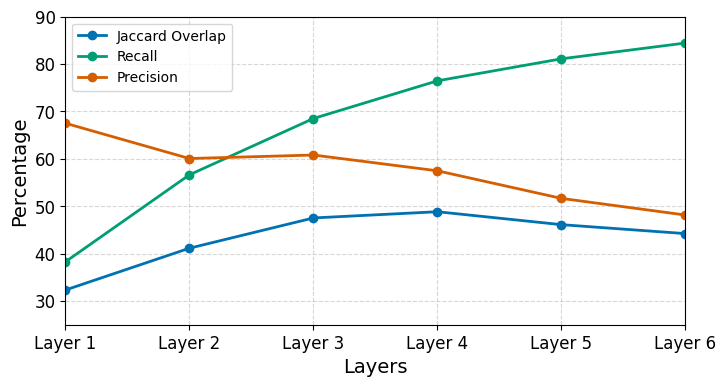

In [110]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,7), jaccard, marker='o', label='Jaccard Overlap')
plt.plot(range(1,7), recall, marker='o', label='Recall')
plt.plot(range(1,7), precision, marker='o', label='Precision')

plt.xticks(range(1,7), [f'Layer {i}' for i in range(1,7)])
plt.xlabel('Layers')
plt.ylabel('Percentage')
plt.legend()
plt.ylim(25, 90)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [106]:
# fig, axes = plt.subplots(1, 6, figsize=(18, 4))  # 1 row, 6 columns

# jaccard = []
# lira = []
# points_removed = set()
# for layer in range(6):
#     iqr_file = os.path.join(iqr_folder, f"layer_{layer}_vulnerable.pkl")
#     lira_file = os.path.join(lira_folder, f"layer_{layer}_vulnerable.pkl")

#     with open(iqr_file, "rb") as f:
#         iqr_indices = set(pickle.load(f))

#     with open(lira_file, "rb") as f:
#         lira_indices = set(pickle.load(f))

#     iqr_indices = iqr_indices - points_removed
#     lira_indices = lira_indices - points_removed

#     print("="*100)
#     print(f"Layer {layer + 1}")
#     percent_overlap = len(iqr_indices & lira_indices) / len(iqr_indices | lira_indices) * 100
#     jaccard.append(percent_overlap)
#     print(f"Jaccard Overlap/Overall Agreement: {percent_overlap:.2f}%")

#     lira_overlap = len(lira_indices & iqr_indices) / len(lira_indices) * 100
#     lira.append(lira_overlap)
#     print(f"Fraction of LiRA points identified by IQR: {lira_overlap:.2f}%")



#     iqr_overlap = len(iqr_indices & lira_indices) / len(iqr_indices) * 100
#     # print(f"Fraction of IQR points identified by LiRA: {iqr_overlap:.2f}%")

#     ax = axes[layer]  
#     venn2([iqr_indices, lira_indices],
#           set_labels=('IQR', 'LIRA'),
#           set_colors=('blue', 'red'),
#           ax=ax)
#     ax.set_title(f"Layer {layer + 1}")

#     points_removed.update(iqr_indices)
#     points_removed.update(lira_indices)

# plt.tight_layout()
# plt.show()

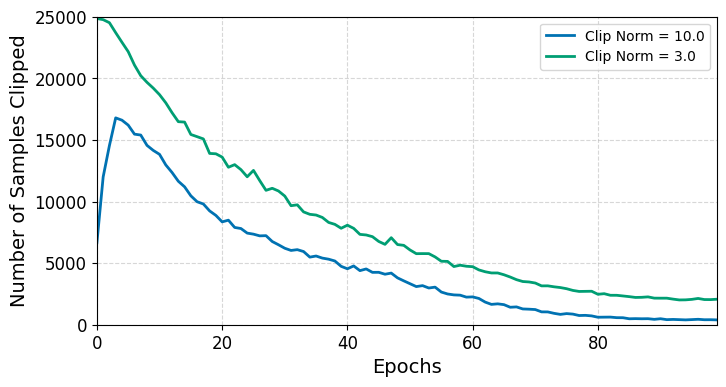

In [71]:
path = "/vol/bitbucket/vb524/lossv2/trained_models/selective_losses/clip_samples_10_metrics.pkl"
path1 = "/vol/bitbucket/vb524/lossv2/trained_models/selective_losses/clip_samples_3_metrics.pkl"

with open(path, "rb") as f:
    metrics = pickle.load(f)

with open(path1, "rb") as f:
    metrics1 = pickle.load(f)


plt.figure(figsize=(8, 4))
epochs = range(len(metrics['trainloader_accs']))
plt.plot(epochs, metrics['clipped_samples'], label='Clip Norm = 10.0')
plt.plot(epochs, metrics1['clipped_samples'], label='Clip Norm = 3.0')
plt.xlabel('Epochs')
plt.ylabel('Number of Samples Clipped')
plt.ylim(0, 25000)
plt.legend()
plt.grid(linestyle='--', alpha=0.5)

plt.show()

In [ ]:
from opacus.accountants.utils import get_noise_multiplier

target_epsilon = 47.92849131290822
target_delta = 1e-5

batch_size = 256
train_dataset = 25000
epochs=100
sample_rate = batch_size / train_dataset
steps = epochs * train_dataset // batch_size

noise_multiplier = get_noise_multiplier(
    target_epsilon=target_epsilon,
    target_delta=target_delta,
    sample_rate=sample_rate,
    steps=steps,
)
print("Noise multiplier:", noise_multiplier)

Noise multiplier: 0.500030517578125


In [ ]:
from opacus.accountants import RDPAccountant
# based on https://opacus.ai/api/_modules/opacus/accountants/rdp.html
# Parameters
noise_multiplier = 0.5
train_dataset = 25000
batch_size = 256
epochs = 100
sample_rate = batch_size / train_dataset
steps = epochs * train_dataset // batch_size
delta = 1e-5


accountant = RDPAccountant()
for _ in range(steps):
    accountant.step(noise_multiplier=noise_multiplier, sample_rate=sample_rate)

# Get epsilon for given delta
epsilon = accountant.get_epsilon(delta=delta)
print("epsilon =", epsilon)



epsilon = 47.92849131290822


In [ ]:
from opacus.accountants import RDPAccountant

def calculate_epsilon_manually(noise_multiplier, sample_rate, steps, delta=1e-5):
    accountant = RDPAccountant()
    
    # This creates ONE history entry: (noise_multiplier, sample_rate, steps)
    # for _ in range(steps):
    #     accountant.step(noise_multiplier=noise_multiplier, sample_rate=sample_rate)
    
    # Or more efficiently, just call once:
    accountant.history.append((noise_multiplier, sample_rate, steps))

    return accountant.get_epsilon(delta=delta)


calculate_epsilon_manually(noise_multiplier, sample_rate, steps)

47.91879313414313